In [1]:
import cv2
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [9]:
# util functions
def plot_images(images: list):
    num_images = len(images)
    _, ax = plt.subplots(1, num_images, figsize=(12, 6))

    for idx, img in enumerate(images):
        ax[idx].imshow(img, cmap='gray')

def read_image(path):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(224, 224))
    return img

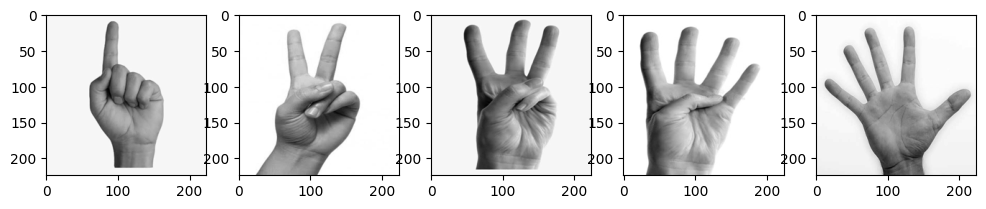

In [3]:
img1 = read_image('./Images/1.jpeg')
img2 = read_image('./Images/2.jpeg')
img3 = read_image('./Images/3.jpeg')
img4 = read_image('./Images/4.jpeg')
img5 = read_image('./Images/5.jpeg')

plot_images([img1,img2,img3,img4,img5])

(226, 226) (226, 226) (226, 226) (226, 226) (226, 226)


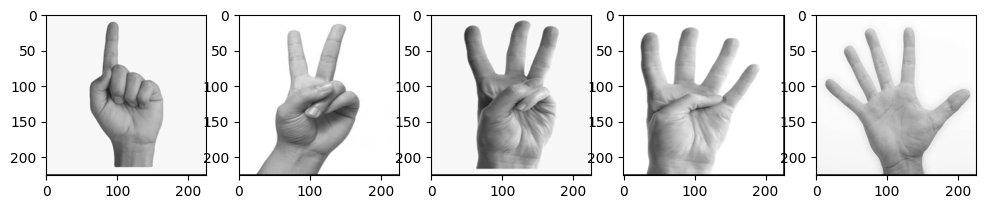

In [10]:
# padding
def get_padding_width_per_side(kernel_size: int) -> int:
    return kernel_size // 2

def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  # Бүх талдаа padding хэрэгтэй тул хоёроор үржүүлнэ
        img.shape[1] + padding_width * 2
    ))
    # Жишээлбэл, img.shape = (224, 224), мөн img_with_padding.shape = (226, 226) бол
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img

    return img_with_padding

img1_with_padding_3x3 = add_padding_to_image(img=np.array(img1), padding_width= get_padding_width_per_side(3))
img2_with_padding_3x3 = add_padding_to_image(img=np.array(img2), padding_width= get_padding_width_per_side(3))
img3_with_padding_3x3 = add_padding_to_image(img=np.array(img3), padding_width= get_padding_width_per_side(3))
img4_with_padding_3x3 = add_padding_to_image(img=np.array(img4), padding_width= get_padding_width_per_side(3))
img5_with_padding_3x3 = add_padding_to_image(img=np.array(img5), padding_width= get_padding_width_per_side(3))

print(img1_with_padding_3x3.shape ,img2_with_padding_3x3.shape,img3_with_padding_3x3.shape, img4_with_padding_3x3.shape,img5_with_padding_3x3.shape)

plot_images([img1_with_padding_3x3,img2_with_padding_3x3,img3_with_padding_3x3, img4_with_padding_3x3, img5_with_padding_3x3])

In [12]:
# convolution
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0

    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            num_pixels += 1

    return num_pixels

calculate_target_size(224,3) # 222

def convolute(img: np.array, kernel: np.array) -> np.array:
    # Тэгш өнцөгт дүрс гэж үзвэл
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    k = kernel.shape[0]

    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))

    for i in range(tgt_size):
        for j in range(tgt_size):
            matrix = img[i:i+k, j:j+k]
            convolved_img[i, j] = np.sum(np.multiply(matrix, kernel))

    return convolved_img

def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

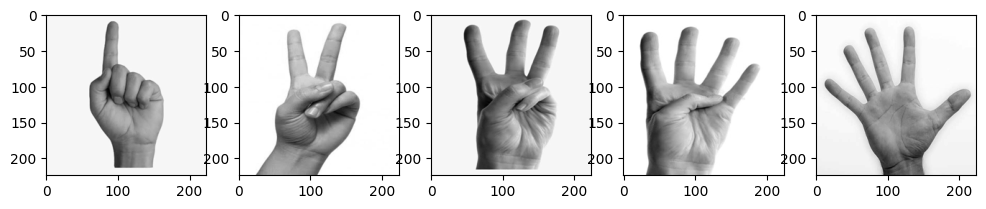

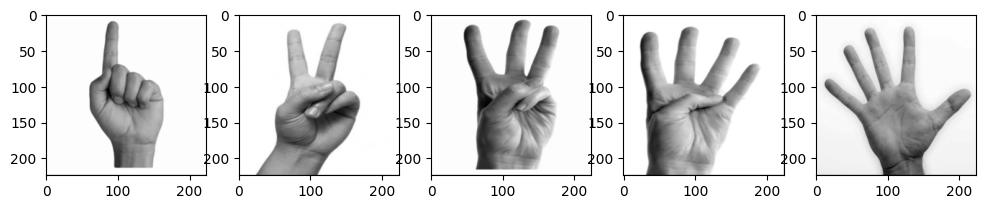

In [14]:
# Guaussian_kernel
def gaussianMask(size, sigma=0.5):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

img_smoothed1 = convolute(img1_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed2 = convolute(img2_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed3 = convolute(img3_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed4 = convolute(img4_with_padding_3x3,gaussianMask(3,0.5))
img_smoothed5 = convolute(img5_with_padding_3x3,gaussianMask(3,0.5))

plot_images([img1, img2, img3, img4, img5])
plot_images([img_smoothed1, img_smoothed2, img_smoothed3, img_smoothed4, img_smoothed5])

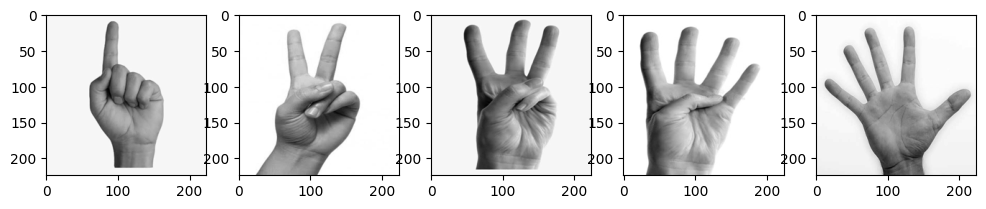

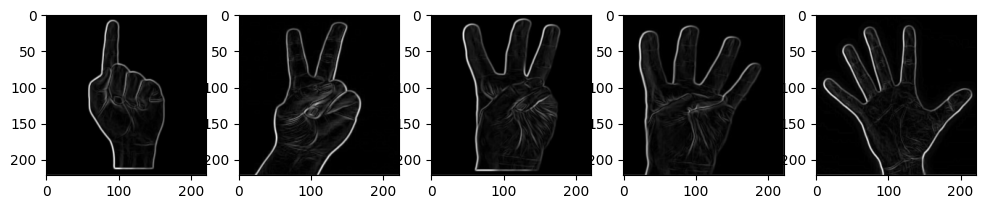

In [16]:
# prewitt
def Prewitt(img):
        Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32)

        Ix = convolute(img,Kx)
        Iy = convolute(img,Ky)

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)

gradientM1, thetaMat1 = Prewitt(img_smoothed1)
gradientM2, thetaMat2 = Prewitt(img_smoothed2)
gradientM3, thetaMat3 = Prewitt(img_smoothed3)
gradientM4, thetaMat4 = Prewitt(img_smoothed4)
gradientM5, thetaMat5 = Prewitt(img_smoothed5)

plot_images([img1, img2, img3, img4, img5])

plot_images([gradientM1, gradientM2, gradientM3, gradientM4, gradientM5])

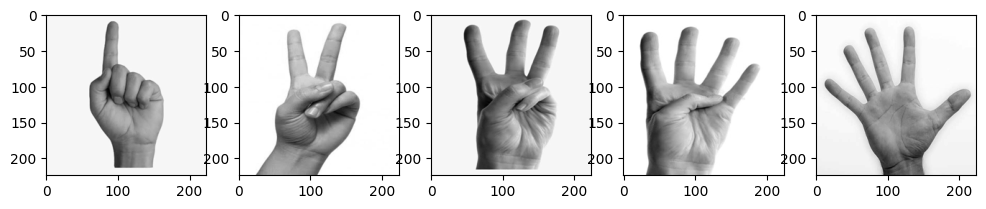

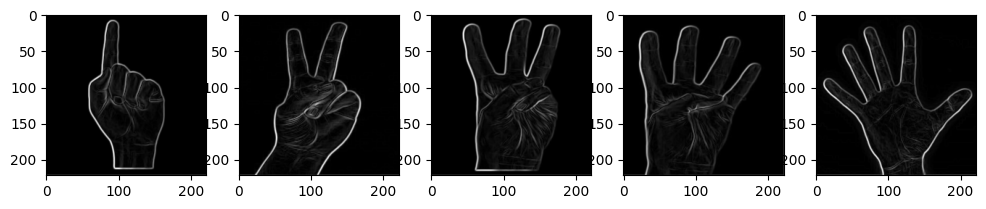

In [18]:
# sobel
def sobil(img):
        Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

        Ix = convolute(img,Kx)
        Iy = convolute(img,Ky)

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)

gradientMat1, thetaMat1 = sobil(img_smoothed1)
gradientMat2, thetaMat2 = sobil(img_smoothed2)
gradientMat3, thetaMat3 = sobil(img_smoothed3)
gradientMat4, thetaMat4 = sobil(img_smoothed4)
gradientMat5, thetaMat5 = sobil(img_smoothed5)

plot_images([img1, img2, img3, img4, img5])

plot_images([gradientMat1, gradientMat2, gradientMat3, gradientMat4, gradientMat5])

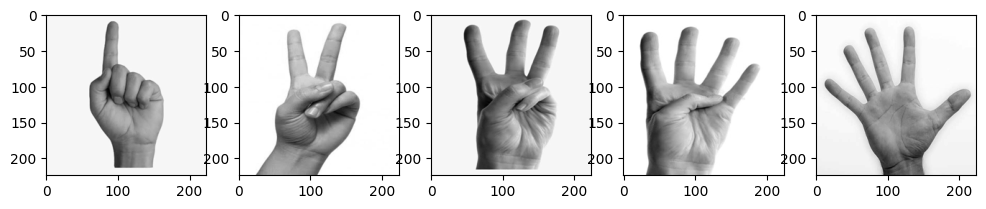

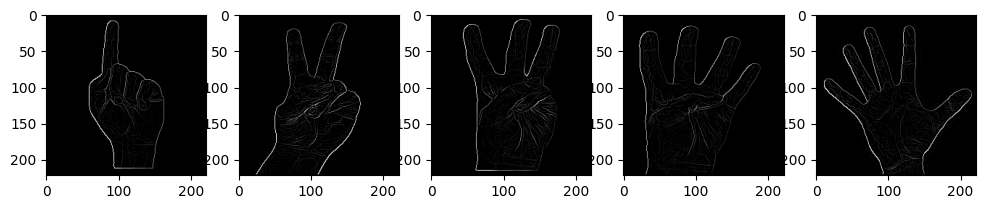

In [20]:
def non_maximaSuppression(img, D):
        M, N = img.shape
        Z = np.zeros((M,N), dtype=np.int32)
        angle = D * 180. / np.pi
        angle[angle < 0] += 180

        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    q = 255
                    r = 255

                   #angle 0
                    if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                        q = img[i, j+1]
                        r = img[i, j-1]
                    #angle 45
                    elif (22.5 <= angle[i,j] < 67.5):
                        q = img[i+1, j-1]
                        r = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        q = img[i+1, j]
                        r = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        q = img[i-1, j-1]
                        r = img[i+1, j+1]

                    if (img[i,j] >= q) and (img[i,j] >= r):
                        Z[i,j] = img[i,j]
                    else:
                        Z[i,j] = 0

                except IndexError as e:
                    pass

        return Z

nonMaxImg1 = non_maximaSuppression(gradientMat1,thetaMat1)
nonMaxImg2 = non_maximaSuppression(gradientMat2,thetaMat2)
nonMaxImg3 = non_maximaSuppression(gradientMat3,thetaMat3)
nonMaxImg4 = non_maximaSuppression(gradientMat4,thetaMat4)
nonMaxImg5 = non_maximaSuppression(gradientMat5,thetaMat5)

plot_images([img1, img2, img3, img4, img5])
plot_images([nonMaxImg1, nonMaxImg2, nonMaxImg3, nonMaxImg4, nonMaxImg5])

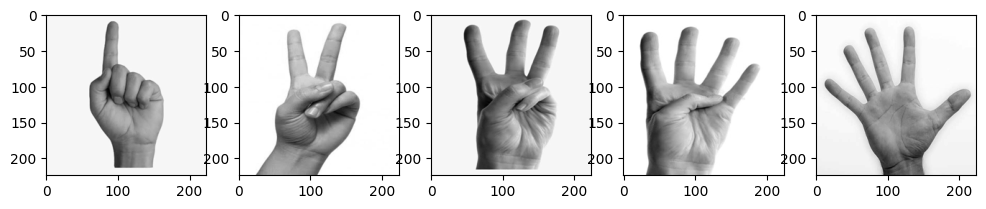

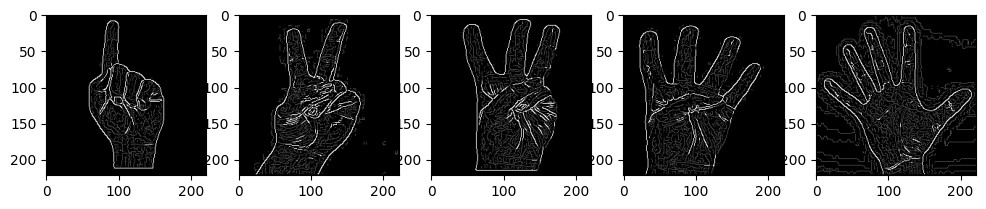

In [21]:
def double_threshold(img):
        # high / low ThresholdRatio
        highThreshold = img.max() * 0.15;
        lowThreshold = highThreshold * 0.05;

        M, N = img.shape
        res = np.zeros((M,N), dtype=np.int32)

        weak = np.int32(75)
        strong = np.int32(255)

        strong_i, strong_j = np.where(img >= highThreshold)
        zeros_i, zeros_j = np.where(img < lowThreshold)

        weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

        res[strong_i, strong_j] = strong
        res[weak_i, weak_j] = weak

        return (res)

thresholdImg1 = double_threshold(nonMaxImg1)
thresholdImg2 = double_threshold(nonMaxImg2)
thresholdImg3 = double_threshold(nonMaxImg3)
thresholdImg4 = double_threshold(nonMaxImg4)
thresholdImg5 = double_threshold(nonMaxImg5)

plot_images([img1, img2, img3, img4, img5])

plot_images([thresholdImg1, thresholdImg2, thresholdImg3, thresholdImg4, thresholdImg5])

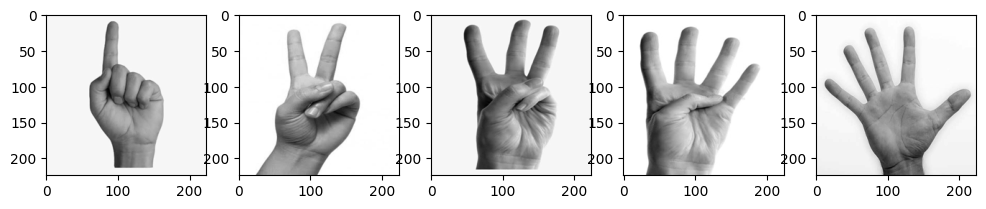

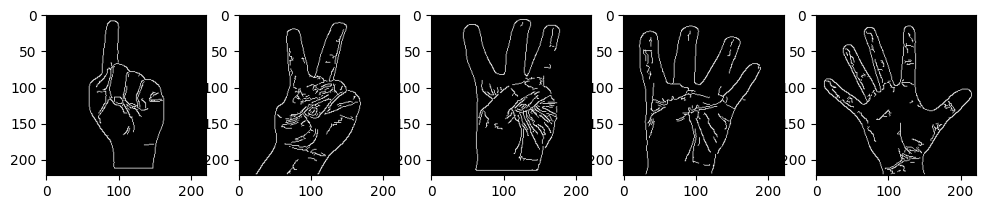

In [22]:
def EdgeLinking(img):

        M, N = img.shape
        weak = 75
        strong = 255

        for i in range(1, M-1):
            for j in range(1, N-1):
                if (img[i,j] == weak):
                    try:
                        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                            img[i, j] = strong
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass
        return img

img_final1 = EdgeLinking(thresholdImg1)
img_final2 = EdgeLinking(thresholdImg2)
img_final3 = EdgeLinking(thresholdImg3)
img_final4 = EdgeLinking(thresholdImg4)
img_final5 = EdgeLinking(thresholdImg5)

plot_images([img1, img2, img3, img4, img5])

plot_images([img_final1, img_final2, img_final3, img_final4, img_final5])